---
<center>Grupo 4 - Yellow Data Team | Mayo 2024
</center>

---
| Integrantes  |
|--------------|
| Laura Moreno |
| Michellynne Borromeau |
| Silvia Alonso |
| Elena Prada |
| Verónica Encinas |
| Soledad Grobas |

# Modelo con Regresión Lineal

##### Nuestro objetivo es elaborar un modelo que prediga el precio de un alquiler turístico en Madrid empleando regresión lineal.

## 1. Carga de Datos

In [1]:
#Cargamos librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'seaborn'

In [2]:
# Cargar desde el .CSV ya preprocesado a un DF de Pandas
df = pd.read_csv('CLEAN-air-bnb-listings2.csv', encoding='utf-8')

df.head() #Ver Cabecera

,location,coordinates,latitude,longitude,name,room type,room price,number of reviews,minimum nights,availibility,rooms rent by the host
0,Ciudad Jardín,"40.45004385318866, -3.6712841871122457",40.450044,-3.671284,Sunny room with balcony in pretty family house,Private room,26,6,7,179,2
1,Trafalgar,"40.43042274619744, -3.701693596173804",40.430423,-3.701694,Apartamento muy cuco en el barrio de Chamberí,Entire home/apt,57,5,1,0,1
2,Castellana,"40.43057627460486, -3.6869397877080177",40.430576,-3.686940,Design apartment in Heart of Madrid,Entire home/apt,190,3,3,179,2
3,Universidad,"40.42584028788459, -3.7030496318151873",40.425840,-3.703050,Trendy hip Malasaña duplex for art&design lovers,Entire home/apt,75,22,5,364,2
4,Justicia,"40.42397401534791, -3.694254168912872",40.423974,-3.694254,MADRID LUXURY & DESIGN,Entire home/apt,180,87,2,0,2


## 2. Pasar Datos Categóricos a Numéricos en 'room type'

In [72]:
# Categorías únicas en la columna 'room type'
unique_room_types = df['room type'].unique()

# Número de categorías únicas
num_room_types = len(unique_room_types)

print("Número de categorías únicas en 'room type':", num_room_types)
print("Categorías únicas en 'room type':", unique_room_types)

Número de categorías únicas en 'room type': 2
Categorías únicas en 'room type': ['Private room' 'Entire home/apt']


In [3]:
# Mapeo de las categorías en 'room type'
df['room type'] = df['room type'].map({'Private room': 0, 'Entire home/apt': 1})

df.head()

,location,coordinates,latitude,longitude,name,room type,room price,number of reviews,minimum nights,availibility,rooms rent by the host
0,Ciudad Jardín,"40.45004385318866, -3.6712841871122457",40.450044,-3.671284,Sunny room with balcony in pretty family house,0,26,6,7,179,2
1,Trafalgar,"40.43042274619744, -3.701693596173804",40.430423,-3.701694,Apartamento muy cuco en el barrio de Chamberí,1,57,5,1,0,1
2,Castellana,"40.43057627460486, -3.6869397877080177",40.430576,-3.686940,Design apartment in Heart of Madrid,1,190,3,3,179,2
3,Universidad,"40.42584028788459, -3.7030496318151873",40.425840,-3.703050,Trendy hip Malasaña duplex for art&design lovers,1,75,22,5,364,2
4,Justicia,"40.42397401534791, -3.694254168912872",40.423974,-3.694254,MADRID LUXURY & DESIGN,1,180,87,2,0,2


## 3. Estandarización de datos y modelo
#### Comprobemos si los datos tienen escalas diferentes empleando la desviación estándar. Así sabremos si es de utilidad normaizarlos antes de construir el modelo.

In [4]:
# Desviación estándar de las características más amplias
std_deviation = df[['rooms rent by the host', 'availibility']].std()

print("Desviación estándar de características:")
print(std_deviation)

Desviación estándar de características:
rooms rent by the host      1.376601
availibility              150.310732
dtype: float64


#### La característica 'rooms rent by the host' tiene una desviación estándar relativamente pequeña (1.376601), mientras que 'availibility' tiene una desviación estándar significativamente mayor (150.310732). Por ello 'availibility' puede tener valores que varían en un rango mucho más amplio en comparación con 'rooms rent by the host'. La normalización puede ser útil para garantizar que todas las características estén en una escala similar, lo que puede ayudar al algoritmo de regresión lineal a converger más rápido y a evitar que características con magnitudes más grandes dominen el modelo.

In [5]:
# Características y el objetivo
features = df[['room type', 'rooms rent by the host', 'availibility']]
target = df['room price']

# Conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Normalizar las características numéricas (menos en 'room type')
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.iloc[:, 1:])
X_test_scaled = scaler.transform(X_test.iloc[:, 1:])

# Media y la desviación estándar después de la estandarización
print("Media de las características en X después de la estandarización:")
print(X_train_scaled.mean(axis=0))
print("\nDesviación estándar de las características en X después de la estandarización:")
print(X_train_scaled.std(axis=0))

Media de las características en X después de la estandarización:
[6.12536841e-17 4.53730993e-18]

Desviación estándar de las características en X después de la estandarización:
[1. 1.]


In [6]:
# Agregar la columna 'room type' a los conjuntos de entrenamiento y prueba sin normalizar
X_train_scaled = np.column_stack((X_train['room type'].values, X_train_scaled))
X_test_scaled = np.column_stack((X_test['room type'].values, X_test_scaled))

# Inicializar y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 984.657556699563
R^2 Score: 0.3104253913398999


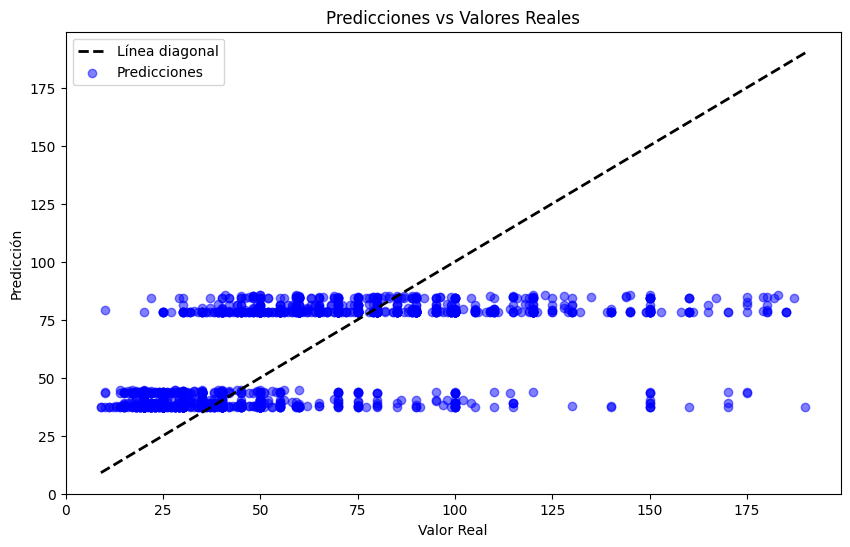

In [7]:
# Evaluación visual de los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Línea diagonal')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.show()

####  Los resultados para este modelo de regresión lineal son muy modestos en la predicción del precio de los alojamientos turísticos, podemos observar que existe underfitting. Teenmos un MSE relativamente alto y un R^2 que explica solo una parte moderada de la variabilidad en los datos. Así que vamos a intentar mejorarlo optimizando hiperparámetros mediante técnicas de regularización.

## 4. Optimización de hiperparámetros con GridSearchCV para Ridge y Lasso

In [8]:
# Definir los valores a probar con GSCV
alphas = [0.1, 0.5, 1, 5, 10]
param_grid_ridge = {'alpha': alphas, 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'], 'tol': [0.001, 0.01, 0.1]}
param_grid_lasso = {'alpha': alphas, 'selection': ['cyclic', 'random'], 'max_iter': [1000, 2000], 'tol': [0.0001, 0.001]}

# Modelos de regresión ridge y LASSO
ridge_model = Ridge()
lasso_model = Lasso()

# Inicializar la búsqueda de hp
ridge_grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid_lasso, cv=5, scoring='neg_mean_squared_error')

# Entrenar modelos
ridge_grid_search.fit(X_train_scaled, y_train)
lasso_grid_search.fit(X_train_scaled, y_train)

# Obtener mejores hiperparámetros
best_alpha_ridge = ridge_grid_search.best_params_['alpha']
best_alpha_lasso = lasso_grid_search.best_params_['alpha']

# Obtener mejores modelos
best_ridge_model = ridge_grid_search.best_estimator_
best_lasso_model = lasso_grid_search.best_estimator_

# Predicciones
y_pred_ridge = best_ridge_model.predict(X_test_scaled)
y_pred_lasso = best_lasso_model.predict(X_test_scaled)

# Evaluar modelos
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Ridge Regression:")
print("Best Alpha:", best_alpha_ridge)
print("Mean Squared Error:", mse_ridge)
print("R^2 Score:", r2_ridge)

print("\nLASSO Regression:")
print("Best Alpha:", best_alpha_lasso)
print("Mean Squared Error:", mse_lasso)
print("R^2 Score:", r2_lasso)

Ridge Regression:
Best Alpha: 1
Mean Squared Error: 984.5711528365132
R^2 Score: 0.3104859016255763

LASSO Regression:
Best Alpha: 0.1
Mean Squared Error: 985.0374047738911
R^2 Score: 0.3101593764340853


#### Conseguimos una leve mejora de los resultados con Ridge Regression. Podríamos llevar a cabo otras acciones para seguir mejorando el modelo.

## 5. Guardamos el modelo

In [9]:
from joblib import dump

modelo_ridge_path = 'modelo_ridge2.joblib'
dump(best_ridge_model, modelo_ridge_path)

print("Modelo de regresión ridge guardado exitosamente en:", modelo_ridge_path)

Modelo de regresión ridge guardado exitosamente en: modelo_ridge2.joblib


## 6. Cargar el modelo y probarlo

In [11]:
# Cargamos
from joblib import load

modelo_ridge_path = 'modelo_ridge2.joblib'

modelo_ridge = load(modelo_ridge_path)

In [12]:
import ipywidgets as widgets

# Función para hacer predicciones
def hacer_prediccion(room_type, rooms_rent, availability):
    # Convertir el tipo de habitación a numérico
    room_type_numeric = 0 if room_type == 'Habitación privada' else 1
    # Hacer la predicción utilizando el modelo cargado
    prediction = modelo_ridge.predict([[room_type_numeric, rooms_rent, availability]])
    return prediction[0]

# Campos para ingresar la información
room_type_widget = widgets.Dropdown(
    options=['Habitación privada', 'Apartamento o Casa enteros'],
    description='Tipo de habitación:',
    value='Habitación privada'
)

rooms_rent_widget = widgets.IntSlider(
    value=5,
    min=1,
    max=10,
    step=1,
    description='Número de habitaciones:',
    continuous_update=False
)

availability_widget = widgets.IntSlider(
    value=180,
    min=0,
    max=365,
    step=1,
    description='Disponibilidad (días):',
    continuous_update=False
)

# Función para actualizar la predicción al hacer clic en el botón
def obtener_precio(button):
    room_type = room_type_widget.value
    rooms_rent = rooms_rent_widget.value
    availability = availability_widget.value
    prediction = hacer_prediccion(room_type, rooms_rent, availability)
    print("Precio predicho del alojamiento:", prediction, "€")

# Botón para obtener el precio
boton_obtener_precio = widgets.Button(description="Obtener Precio")
boton_obtener_precio.on_click(obtener_precio)

# Mostrar los campos y el botón en el notebook
widgets.VBox([room_type_widget, rooms_rent_widget, availability_widget, boton_obtener_precio])